In [1]:
import matplotlib.pyplot as plt
import os, pickle
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [4]:
%run plottingextravaganza.py

In [5]:
resultdir = os.path.normpath(os.getcwd() + "\\plot_dev")
resultfiles = os.listdir(resultdir)

theeverything = []

for file in resultfiles:
    if file.endswith(".p"):
        theeverything.append( pickle.load(open(resultdir+"\\"+file, 'rb')) )

In [6]:
for name in theeverything[1].values():
    print(latex_processing (ising_name_processing (name) ))

$R_{x}$
$R_{y}$
$R_{z}$
$R_{xy}$
$R_{xz}$
$R_{xyz}$
$R_{xyz}HF_{x}$
$R_{xyz}HF_{y}$
$R_{xyz}HF_{z}$
$R_{xyz}HF_{xy}$
$R_{xyz}HF_{xz}$
$R_{xyz}HF_{xyz}$
Term zTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}$
$R_{xyz}HF_{xyz}T_{xy}$
$R_{xyz}HF_{xyz}T_{xz}$
$R_{xyz}HF_{xyz}T_{xy,xz}$
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xz}$
$R_{xyz}HF_{xyz}T_{xz,yz}$
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xy,xz}$
$R_{xyz}HF_{xyz}T_{xy,xz,yz}$
Term zTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xy,xz}$


In [7]:
theeverything[0]

{0: {1.0: [3.527246461067839],
  2.0: [3.0263210486715355],
  4.0: [0.6777750571934382, 0.38582627861212515],
  5.0: [2.4906833222865274],
  6.0: [0.990409746858398],
  9.0: [1.8233750167696199],
  11.0: [0.48703649472292954],
  14.0: [6.537770396961559],
  15.0: [8.412266174972729],
  19.0: [0.3714512238095762]},
 1: {0.0: [0.28350726580565055], 2.0: [0.051793404764221444]},
 2: {0.0: [0.3304342083728923], 1.0: [19.307477555342984]},
 3: {4.0: [0.12760796887271877]},
 4: {0.0: [1.4754157583503376, 2.591840046761847],
  3.0: [7.836501190591314],
  5.0: [1.1350051438754571, 2.3776702229490936],
  6.0: [0.5671741659825383],
  9.0: [0.15976808424339375],
  11.0: [0.33697797496483006],
  14.0: [0.2025097840734212],
  15.0: [16.062164166712645],
  19.0: [0.3538868792562836]},
 5: {0.0: [0.4014962444450657],
  4.0: [0.8810532757459723, 0.4205797718910198],
  6.0: [0.09522312129397376, 1.4521809879431342],
  9.0: [0.48483356911220854],
  11.0: [0.07000645735649817],
  14.0: [0.601383055006257

In [12]:
BFmatrix = BayF_IndexDictToMatrix(theeverything[1], theeverything[0])

In [13]:
checkcouple = (0,14)
try:
    print(theeverything[0][checkcouple[0]][checkcouple[1]])
except:
    print("missing")
print(BFmatrix[checkcouple])

[6.537770396961559]
6.53777039696


In [14]:
X = np.log10(BFmatrix)

In [15]:
labels = list( map(lambda name: latex_processing (ising_name_processing (name) ), list(theeverything[1].values()) ))

Term zTx doesn't belong to rotations, Hartree-Fock or transverse.
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
Term zTx doesn't belong to rotations, Hartree-Fock or transverse.


def format_fn(tick_val, tick_pos):
    
    if int(tick_val) in range(len(labels)):
        return labels[int(tick_val)]
    else:
        return ''

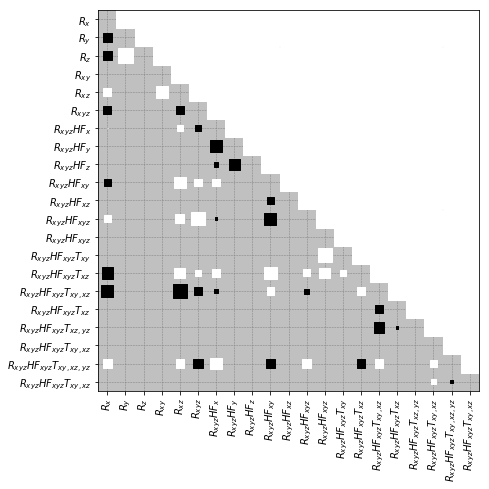

In [104]:
fig, ax = plt.subplots(figsize=(7,7))

hinton(X, use_default_ticks=True, skip_diagonal=True, skip_which = 'upper', where_labels = 'bottomleft', white_half = 1.5)

ax.xaxis.set_major_formatter(QMDFuncFormatter(format_fn, labels) )
ax.yaxis.set_major_formatter(QMDFuncFormatter(format_fn, labels ))

# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

plt.xticks(rotation=90)

# savefigs(expdire, "EXP_CompareModels_BFhinton"+mytimestamp+".pdf")

plt.show()

In [96]:
%run plottingextravaganza.py

In [98]:
mydearones = [0, 11, 15]

In [100]:
import itertools

In [117]:
X[pair]

0.0

In [118]:
Y = np.zeros([len(mydearones), len(mydearones)])

pairs = list(itertools.product(mydearones, repeat=2))
    
for long_index in range(len(pairs)):
    Y[ int(long_index/len(Y)) , long_index%len(Y) ] = X[pairs[long_index]]

In [119]:
Y

array([[ 0.        , -0.31243849,  0.92491301],
       [ 0.31243849,  0.        ,  0.1546431 ],
       [-0.92491301, -0.1546431 ,  0.        ]])

In [122]:
upind = np.triu_indices(len(Y))
loind = np.tril_indices(len(Y))

diagindu = [len(X)-i for i in range(len(Y))]
diagindu = [int(np.sum(diagindu[0:i])) for i in range(len(diagindu))]

diagindl = [i+2 for i in range(len(Y))]
diagindl = [int(np.sum(diagindl[0:i])) for i in range(len(diagindl))]

ndupind = []
ndloind = []

for dimension in range(2):
    ndupind.append(np.delete(upind[dimension], diagindu))
    ndloind.append(np.delete(loind[dimension], diagindl))
    
histpos = [tuple(ndupind)]

In [125]:
histpos

[(array([0, 0, 1, 1, 2], dtype=int64), array([1, 2, 1, 2, 2], dtype=int64))]

In [123]:
from mpl_toolkits.mplot3d import Axes3D

30 -60 10


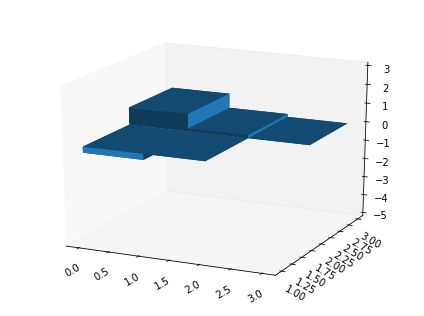

In [124]:
# setup the figure and axes
fig = plt.figure(figsize = (6, 6*3/4))
ax1 = fig.add_subplot(111, projection='3d')

poses = list(range(len(histpos)))

for pose, indices in zip(poses, histpos):
    top = Y[indices]
    bottom = np.zeros_like(top)
    width = depth = 1
    
    myalpha = 0.5 if pose is 1 else 0.8
    ax1.bar3d(indices[0], indices[1], bottom, width, depth, top, alpha= myalpha)

azm=ax1.azim
ele=ax1.elev
dst=ax1.dist 
print(ele, azm, dst)
ax1.set_zlim(-5,3)    
ax1.view_init(elev=20, azim=-65)

ax1.grid(False)

# ax1.xaxis.set_major_formatter(QMDFuncFormatter(format_fn, labels))
# ax1.yaxis.set_major_formatter(QMDFuncFormatter(format_fn, labels))

plt.xticks(rotation=30)
plt.yticks(rotation=-30)
# ax1.set_ylim(-1,5)   

plt.tight_layout()

# savefigs(expdire, "EXP_CompareModels_3D"+mytimestamp+".pdf")

plt.show()